# Run n-body simulations

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as p
import astropy.units as u
import funcs

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
# Kepler 16
k16 = funcs.CBSystem(m1 = 0.6897,f1 = 1.,m2 = 0.20255,f2 = 0.01555,
                    ab = 0.22431,r1 = 0.6489 * u.Rsun.to('au'),r2 = 0.22623 * u.Rsun.to('au'),
                    eb = 0.15944,ib = np.deg2rad(90.3401),wb = np.deg2rad(263.464),
                    fb = np.deg2rad(186.53239),
                    mp = .03e-3,ap = 0.7048,rp = 0.7538 * u.Rjupiter.to('au'),ep = 0.0069,
                    ip = np.deg2rad(90.0322),wp = np.deg2rad(318.0),fp = np.deg2rad(148.92),
                    Wp = np.deg2rad(0.003),
                    t0 = 2455212.12316)

# Kepler 34
k34 = funcs.CBSystem(m1 = 1.0479,f1 = 1.,m2 = 1.0208,f2 = 0.8475,
                    ab = 0.22882,r1 = 1.1618 * u.Rsun.to('au'),r2 = 1.0927 * u.Rsun.to('au'),
                    eb = 0.52087,ib = np.deg2rad(89.8584),wb = 1.2468,
                    fb = 3.4675,
                    mp = 0.220 * u.Mjup.to('Msun'),ap = 1.0896,rp = 0.764 * u.Rjupiter.to('au'),ep = 0.182,
                    ip = np.deg2rad(90.355),wp = 0.1378,fp = 2.0623,
                    Wp = np.deg2rad(-1.74),
                    t0 = 2454969.2000)

# Kepler 35
k35 = funcs.CBSystem(m1 = 0.8877,f1 = 1.,m2 = 0.8094,f2 = 0.3941,
                    ab = 0.17617,r1 = 1.0284 * u.Rsun.to('au'),r2 = 0.7861 * u.Rsun.to('au'),
                    eb = 0.1421,ib = np.deg2rad(90.4238),wb = 1.507,
                    fb = 0.06543,
                    mp = 0.127 * u.Mjup.to('Msun'),ap = 0.60347,rp = 0.728 * u.Rjupiter.to('au'),ep = 0.042,
                    ip = np.deg2rad(90.76),wp = 1.1541,fp = 1.3069,
                    Wp = np.deg2rad(-1.24),
                    t0 = 2454965.8500)

sys = 'k35'
if sys == 'k16':
    cb = k16
if sys == 'k34':
    cb = k34
if sys == 'k35':
    cb = k35

ab0 = cb.ab
mb0 = cb.m1 + cb.m2
p_p0 = (cb.ap**3/(cb.m1+cb.m2))**(1./2.)*365.25 #in days
fp0 = cb.fp
print(1/np.sqrt( (cb.m1+cb.m2)/cb.ab**3 )*365.25)
print(p_p0)

timing_precision = 30./86400./365.25 * (2*np.pi)  #in years/2pi
dt = 0.02
t = np.arange(2454953,2456424,dt)


20.7316772617
131.43772562486816


In [3]:
tts = funcs.reb_cb(cb,tmin=np.min(t),tmax=np.max(t))
tts_2,tds_2 = funcs.reb_cb_dvm(cb,0,2,tmin=np.min(t),tmax=np.max(t), timing_precision=timing_precision)
    
ok = tts[:,0] == 20
#ref_tts = tts[ok]
ref_tts = tts_2[tds_2>0]
ref_tds = tds_2[tds_2>0]
print(ref_tts)
print(ref_tds)

[ 2455332.87041014  2455460.2174625   2455586.42187743  2455712.356026
  2455838.3220782   2455964.64963706  2456092.50592814]
[ 0.48850902  0.23723435  0.181051    0.17016807  0.18964684  0.25943775
  0.54551647]


<IPython.core.display.Javascript object>


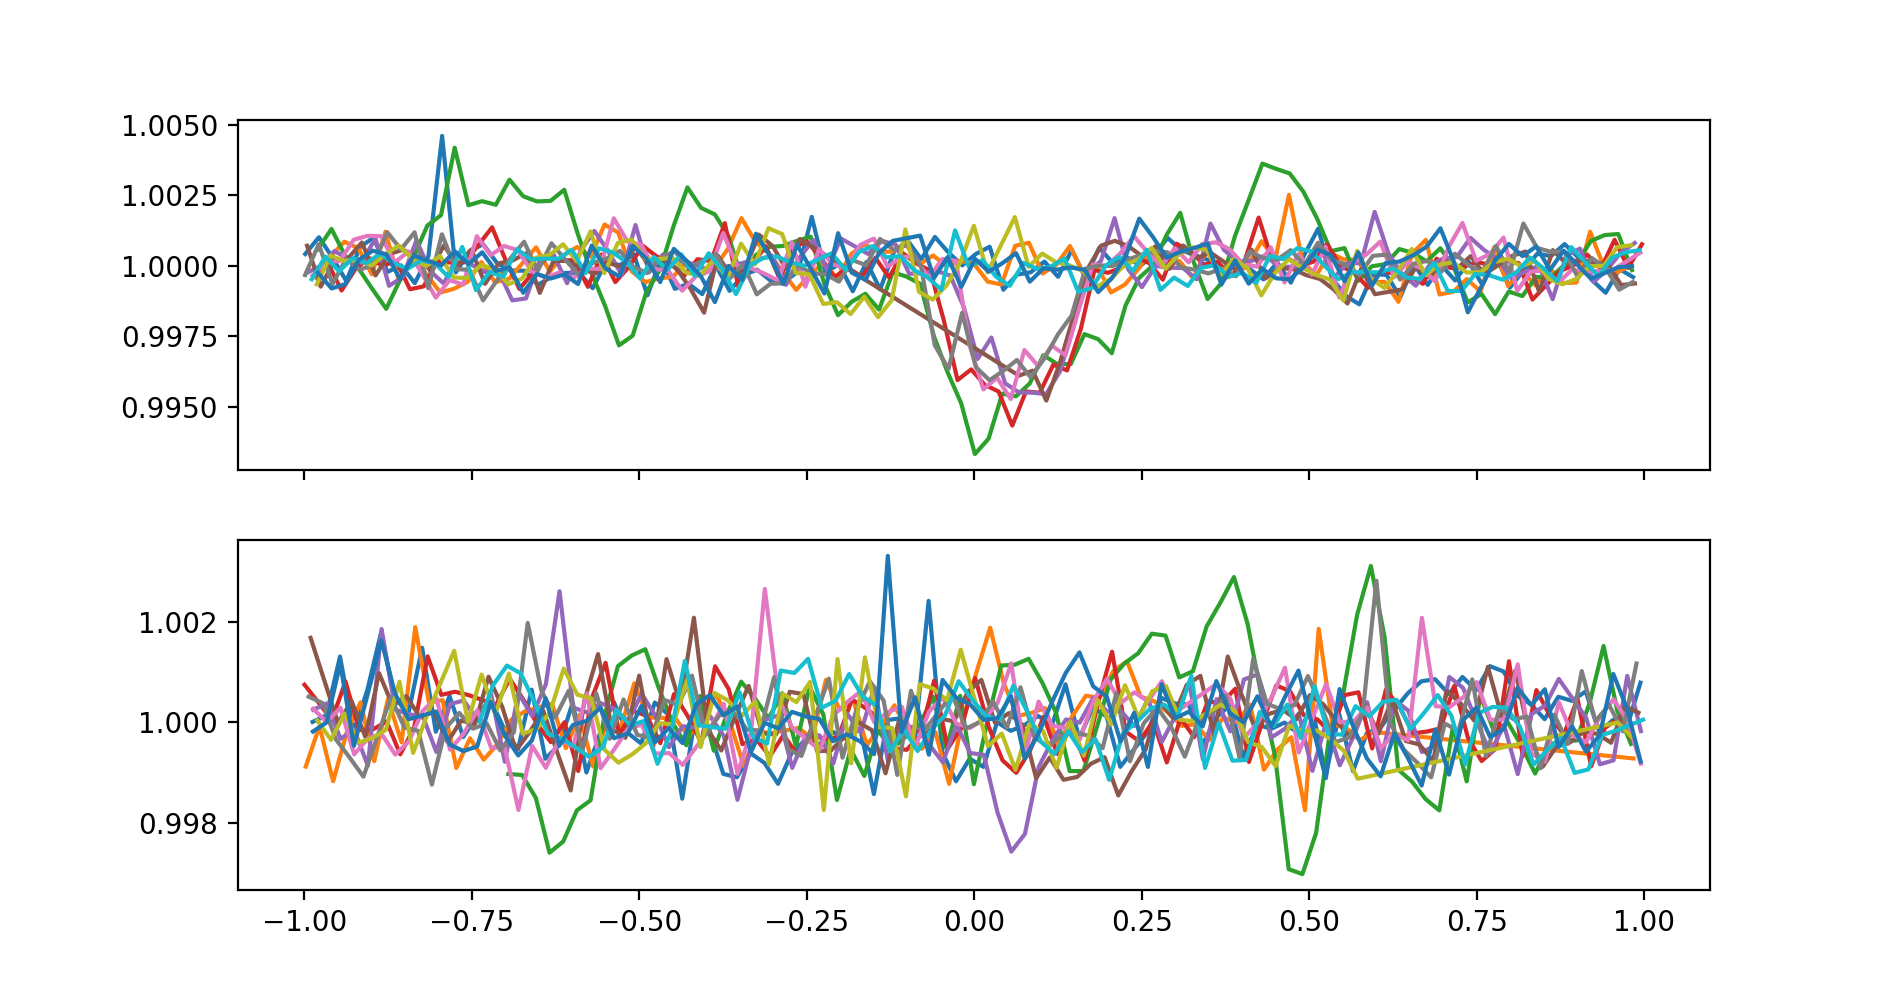

0.996832341158
0.999631592004


In [4]:
#Load lightcurve
lc = np.genfromtxt('Lightcurves/K35_clean_noecl.txt')
time = lc[:,0]+2454833
flux = lc[:,1]
err = lc[:,2]

# and check it stacks right
window = 1.0
    
fig,ax = p.subplots(2, figsize=(9.5,5), sharex=True)

times, stack = funcs.stack(time, flux, cb)
for t,s in zip(times,stack):
    ax[0].plot(t, s)

print(funcs.stack_metric(times,stack))

times, stack = funcs.stack(time, flux, cb, event=21)
for t,s in zip(times,stack):
    ax[1].plot(t, s)

print(funcs.stack_metric(times,stack))

In [5]:
#degrading our knowledge (assume we know eb and wb):
#for now, radii left as we know them - this will change transit durations, and whether some marginal transits happen.

cb.ib = np.pi/2.
cb.ip = np.pi/2.
cb.Wp = 0.0
cb.ep = 0.0
#cb.wp left as is because it defines f_p
cb.mp = 0.0

In [6]:
#define range over which to scan
ppset = np.linspace(p_p0*0.97,p_p0*1.03,101)
#fpset = np.linspace(cb.fp*0.98,cb.fp*1.02,11)
print(np.diff(1./ppset))
nbins = int( (1/130. - 1/500.) / (2.5e-6) )
print(nbins)
invppset = np.linspace(1/500.,1/130.,nbins)
ppset = 1./invppset[::-1] #uniform in frequency
fpset = np.linspace(0,2*np.pi,700)
print(ppset)
print(fpset)

[ -4.84863167e-06  -4.84264077e-06  -4.83666097e-06  -4.83069224e-06
  -4.82473455e-06  -4.81878788e-06  -4.81285219e-06  -4.80692747e-06
  -4.80101368e-06  -4.79511079e-06  -4.78921878e-06  -4.78333763e-06
  -4.77746731e-06  -4.77160778e-06  -4.76575903e-06  -4.75992102e-06
  -4.75409373e-06  -4.74827714e-06  -4.74247122e-06  -4.73667594e-06
  -4.73089128e-06  -4.72511720e-06  -4.71935369e-06  -4.71360072e-06
  -4.70785826e-06  -4.70212629e-06  -4.69640478e-06  -4.69069371e-06
  -4.68499305e-06  -4.67930278e-06  -4.67362286e-06  -4.66795328e-06
  -4.66229402e-06  -4.65664503e-06  -4.65100631e-06  -4.64537782e-06
  -4.63975955e-06  -4.63415146e-06  -4.62855353e-06  -4.62296574e-06
  -4.61738806e-06  -4.61182047e-06  -4.60626294e-06  -4.60071546e-06
  -4.59517799e-06  -4.58965051e-06  -4.58413299e-06  -4.57862543e-06
  -4.57312778e-06  -4.56764002e-06  -4.56216214e-06  -4.55669411e-06
  -4.55123590e-06  -4.54578749e-06  -4.54034886e-06  -4.53491999e-06
  -4.52950085e-06  -4.52409141e-06

In [7]:
#run nbody scan
tts_all = {}
tds_all = {}

#horrible for loop 

for ipp,pp in enumerate(ppset):
    cb.ap = ( (cb.m1+cb.m2) * (pp/365.25)**2 )**(1./3.)
    if ipp%5 == 0:
        print(ipp/len(ppset))
    tts_all[str(pp)[:6]] = {}
    tds_all[str(pp)[:6]] = {}
       
    for fp in fpset:
        cb.fp = fp
                     
        ttimes, tdurs = funcs.reb_cb_dvm(cb, 0, 2, tmin=np.min(time), 
                                        tmax=np.max(time), timing_precision=timing_precision)
                            
        tts_all[str(pp)[:6]][str(fp)[:6]] = ttimes[tdurs>0]
        tds_all[str(pp)[:6]][str(fp)[:6]] = tdurs[tdurs>0]

0.0
0.0021968365553602814
0.004393673110720563
0.006590509666080844
0.008787346221441126
0.010984182776801407
0.013181019332161687
0.015377855887521968
0.01757469244288225
0.01977152899824253
0.021968365553602813
0.024165202108963092
0.026362038664323375
0.028558875219683654
0.030755711775043937
0.032952548330404216
0.0351493848857645
0.03734622144112478
0.03954305799648506
0.04173989455184534
0.043936731107205626
0.046133567662565905
0.048330404217926184
0.05052724077328647
0.05272407732864675
0.05492091388400703
0.05711775043936731
0.059314586994727594
0.061511423550087874
0.06370826010544815
0.06590509666080843
0.06810193321616871
0.070298769771529
0.07249560632688928
0.07469244288224956
0.07688927943760984
0.07908611599297012
0.0812829525483304
0.08347978910369068
0.08567662565905097
0.08787346221441125
0.09007029876977153
0.09226713532513181
0.09446397188049209
0.09666080843585237
0.09885764499121265
0.10105448154657294
0.10325131810193322
0.1054481546572935
0.10764499121265378
0.

0.9358523725834798
0.93804920913884
0.9402460456942003
0.9424428822495606
0.9446397188049209
0.9468365553602812
0.9490333919156415
0.9512302284710018
0.953427065026362
0.9556239015817223
0.9578207381370826
0.9600175746924429
0.9622144112478032
0.9644112478031635
0.9666080843585237
0.968804920913884
0.9710017574692443
0.9731985940246046
0.9753954305799648
0.9775922671353251
0.9797891036906854
0.9819859402460457
0.984182776801406
0.9863796133567663
0.9885764499121266
0.9907732864674869
0.9929701230228472
0.9951669595782073
0.9973637961335676
0.9995606326889279


In [8]:
with open(sys+'-nbody.pkl','wb') as f:
    pickle.dump(tts_all,f)
    pickle.dump(tds_all,f)